# <font color='green'>Breast Cancer Classification

## This breast cancer classification project utilizes machine learning techniques to predict whether a given case is malignant or benign. The data is first preprocessed by applying scaling techniques, followed by tuning of hyperparameters using grid search methodology. Next, feature selection is carried out using permutation importance. Finally, the model is evaluated using appropriate evaluation metrics.


### 1= Malignant (Cancerous) - Present
### 0= Benign (Not Cancerous) -Absent

In [33]:
# importings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sns
from pandas.plotting  import scatter_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('breast_cancer_2.csv',usecols=lambda x:x !='id')

In [4]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
def check_data_is_clean(df):
    check_missing_values=(df.isna().sum()).sum()
    check_dublicates=df.duplicated().sum()
    if (check_missing_values and check_dublicates) ==0:
        
        return print('\033[1m The Data has no Missing values and no Dublicated values\033[0m ')
    else:
        return print('\033[1mThe Data has {} Missing values and {} Dublicated values'.format(check_missing_values,check_dublicates))

In [5]:
# see the skew of the data 
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

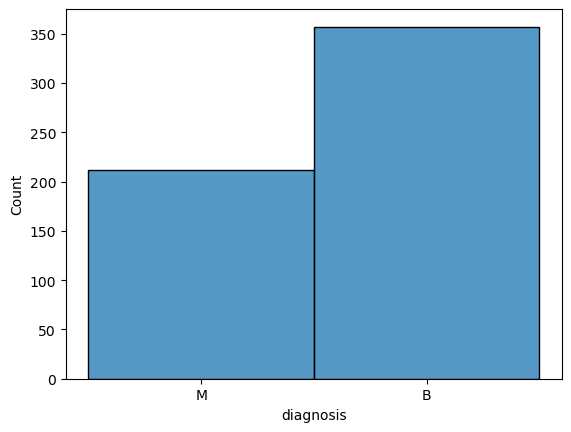

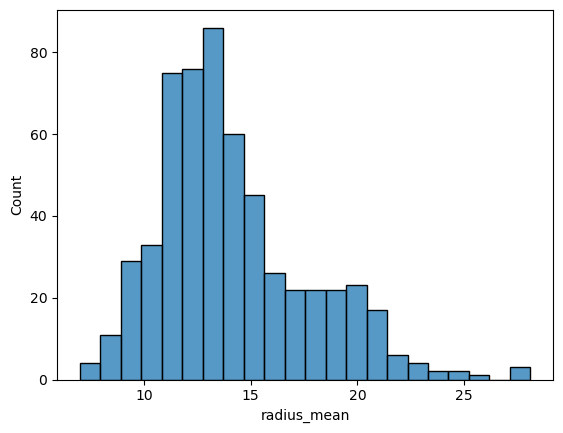

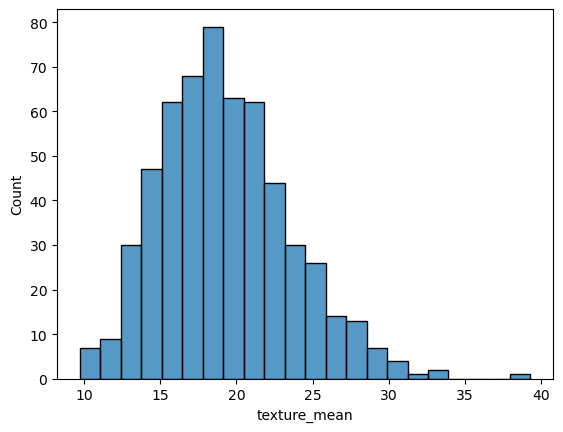

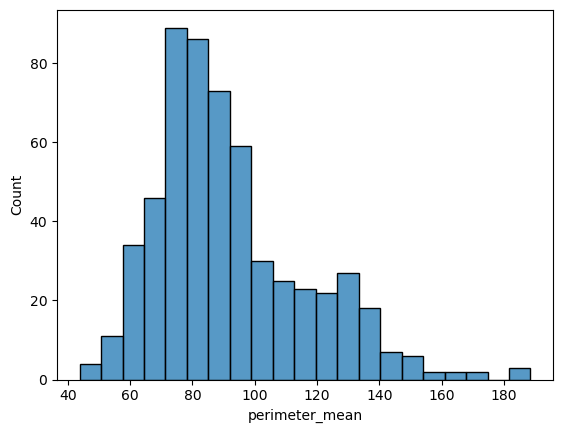

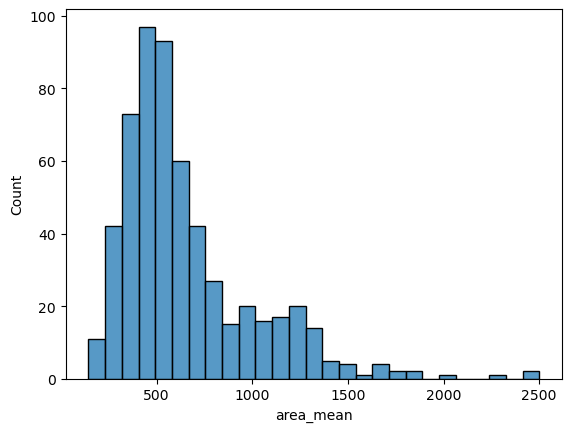

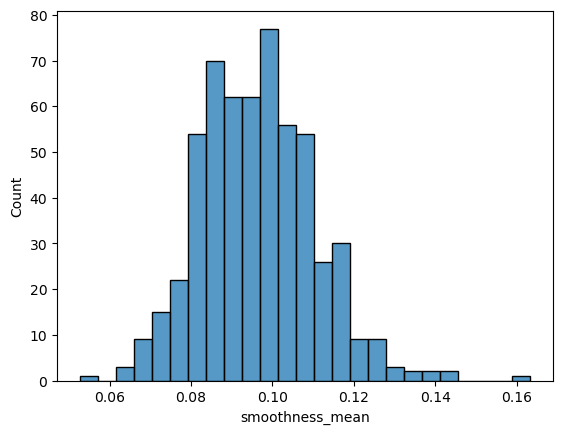

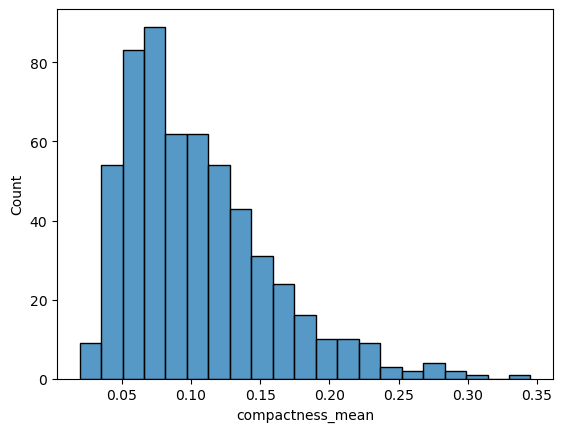

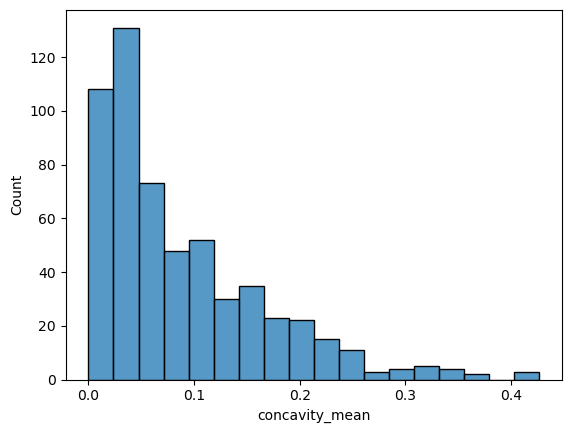

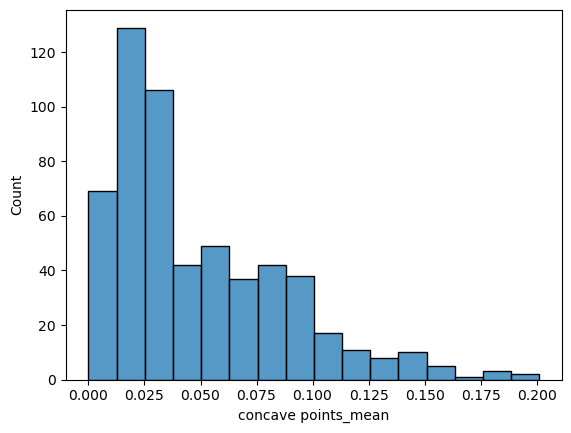

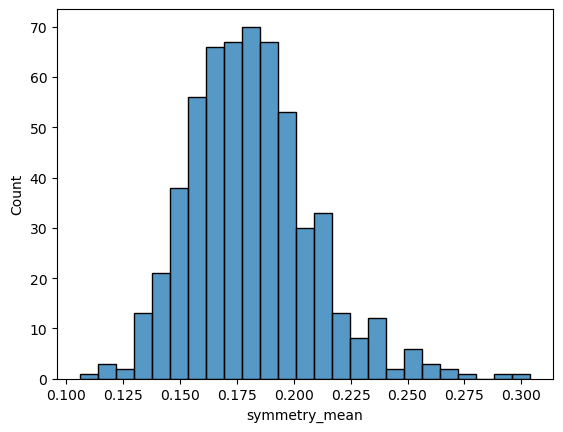

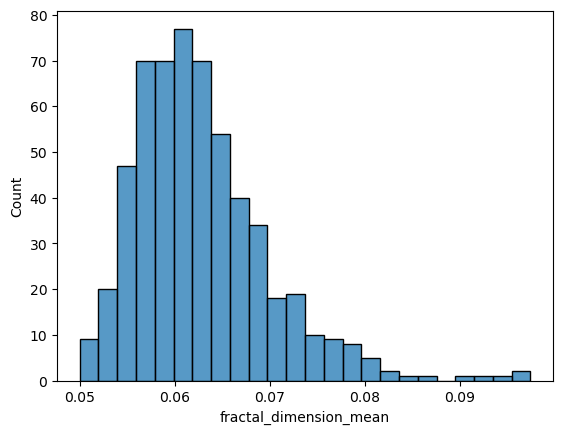

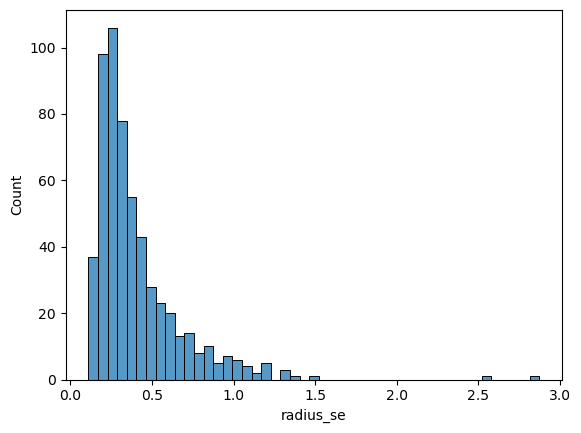

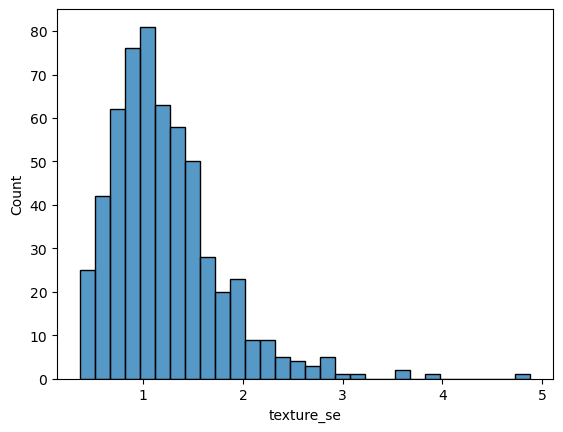

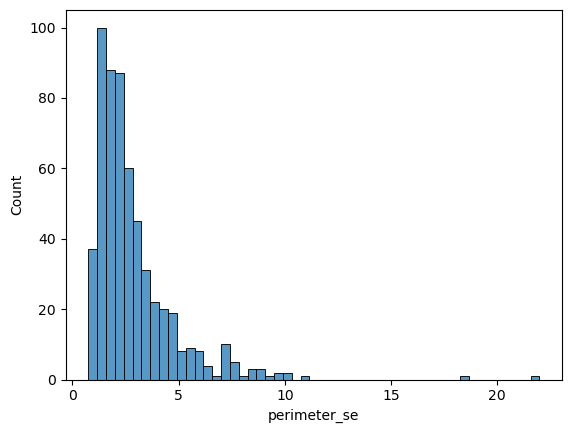

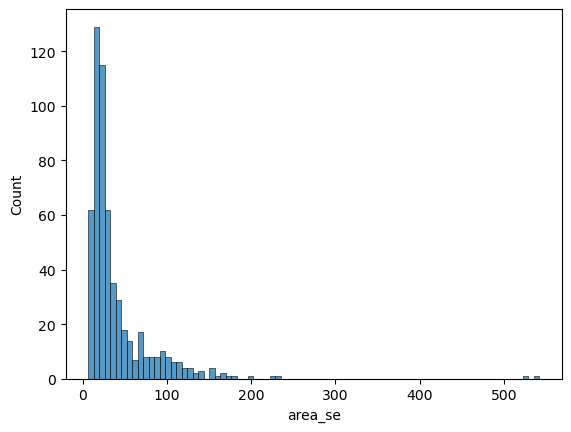

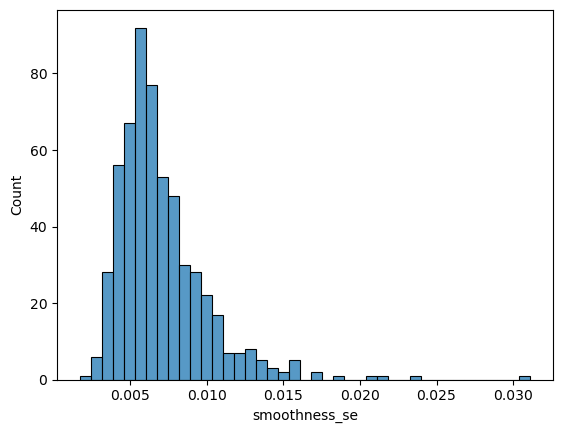

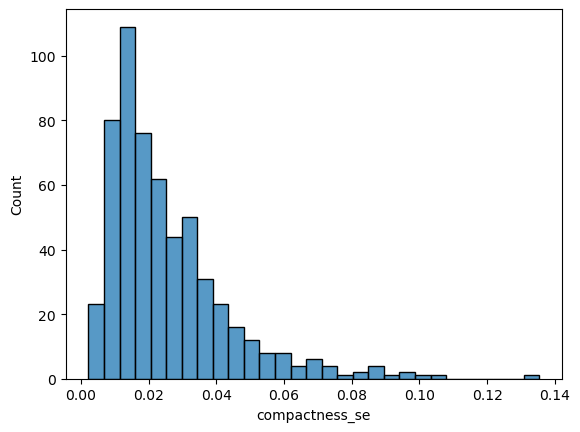

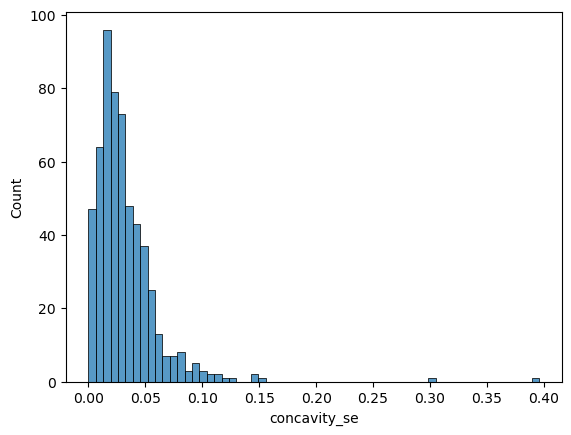

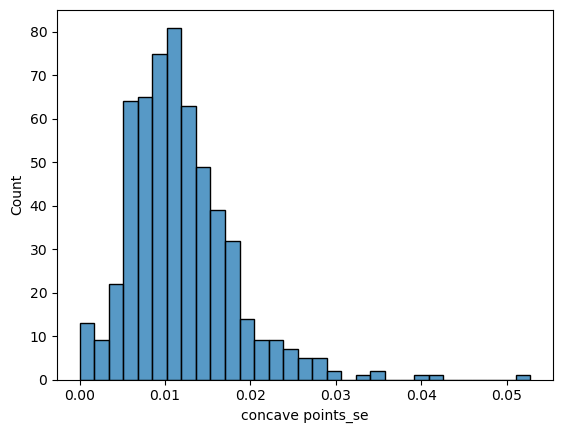

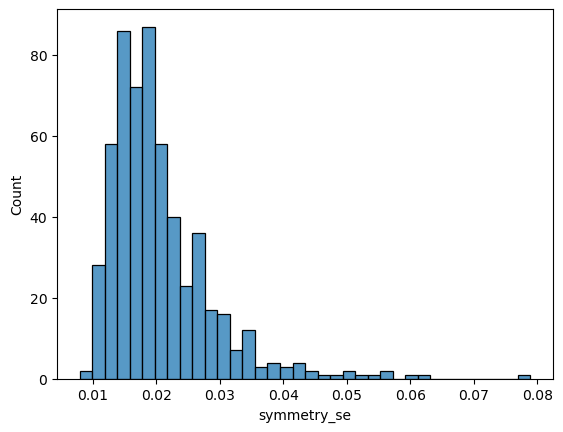

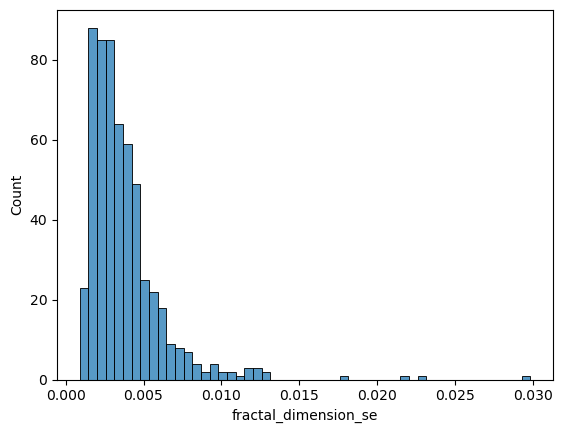

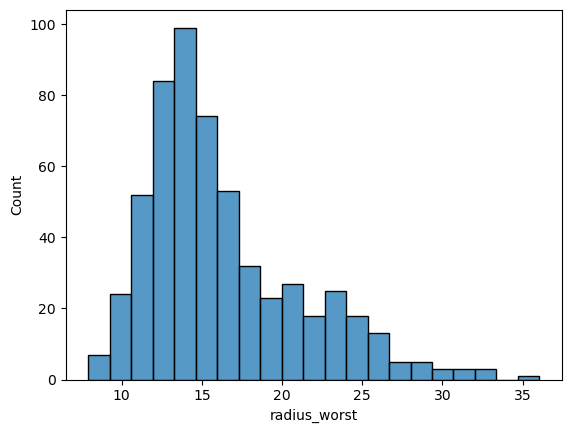

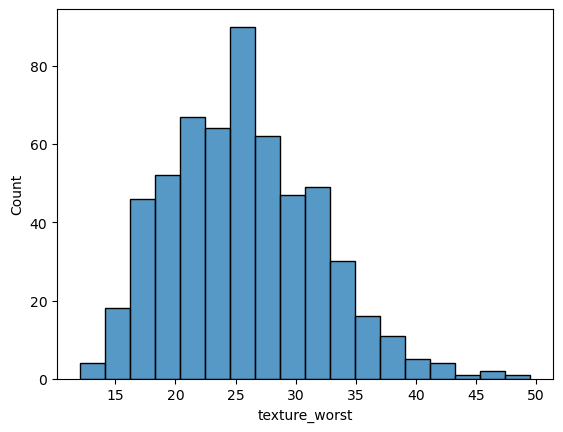

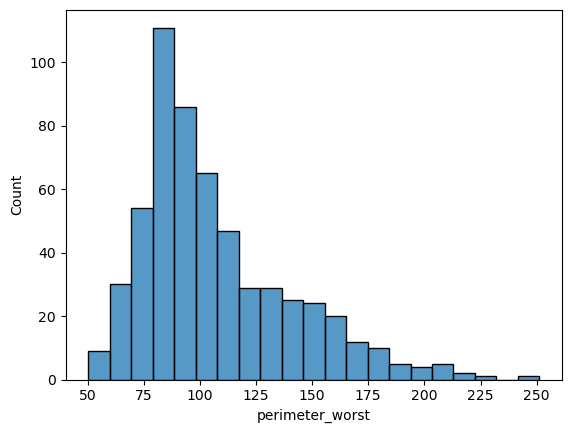

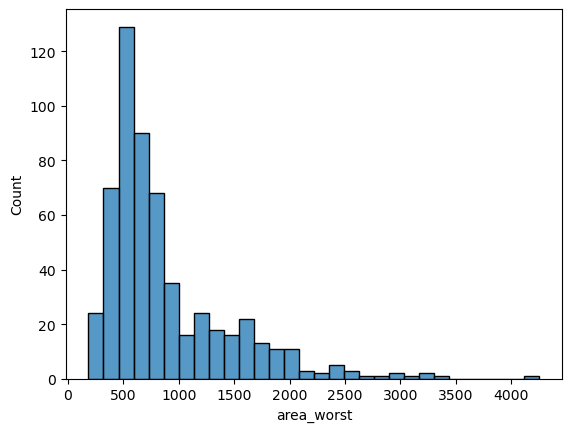

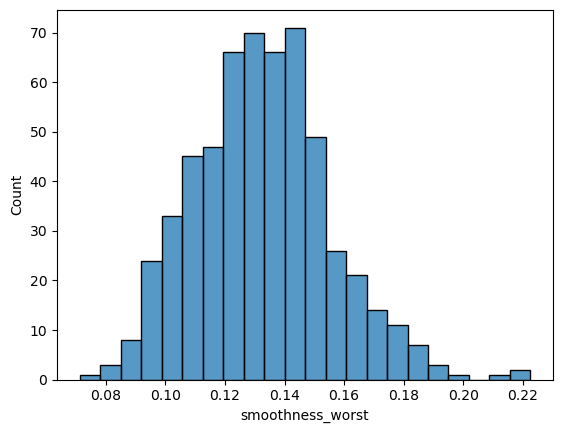

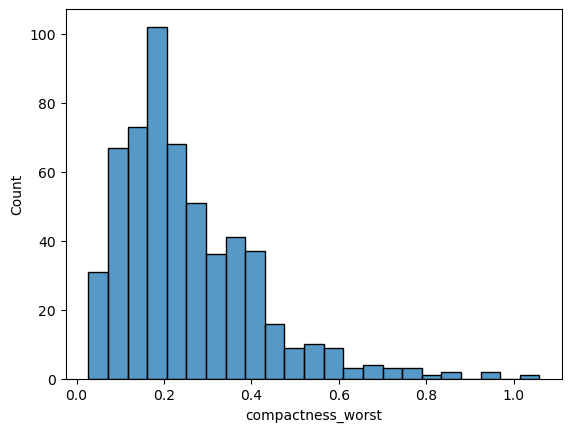

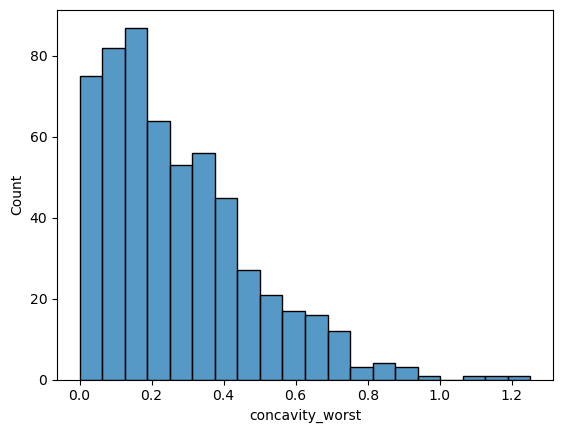

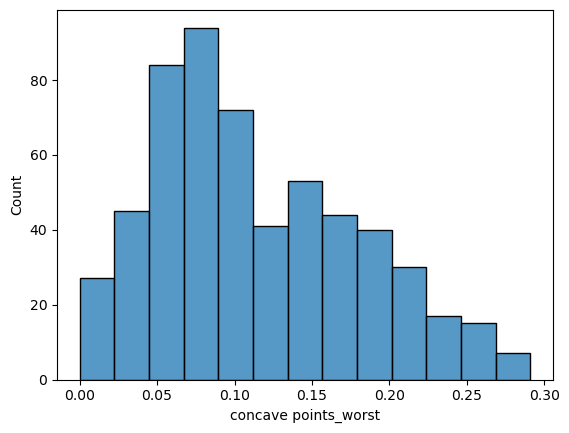

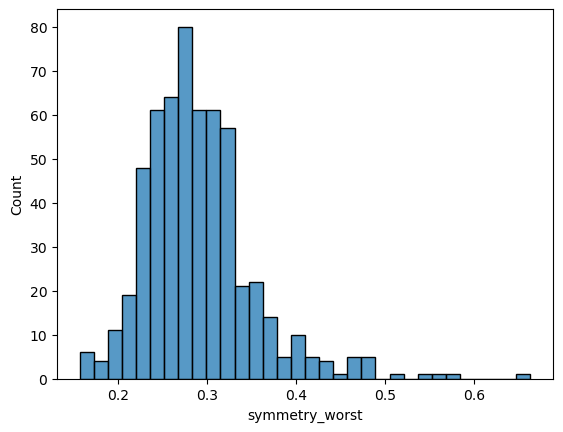

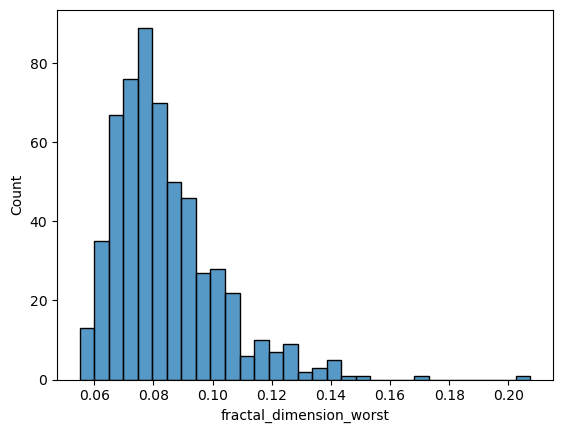

In [6]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

In [7]:
check_data_is_clean(df)

 The Data has no Missing values and no Dublicated values 


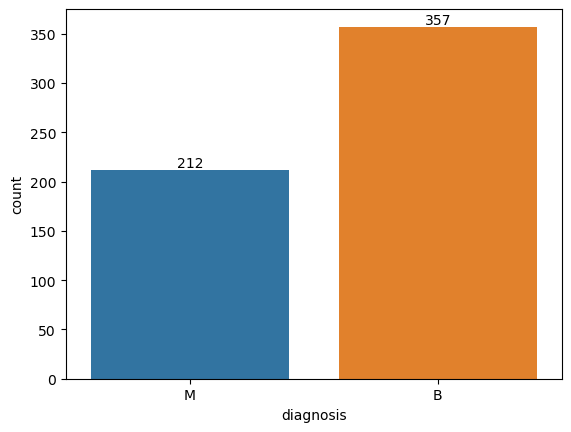

In [10]:
ax = sns.countplot(df['diagnosis'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


In [11]:
# from the mean i can see wether the feature can differ in each case of not 
for i in df.columns[1:]:
    print('The mean value for {} for Malignant cases'.format(i),df[df['diagnosis']=='M'][i].mean())
    print('The mean value for {} for benign cases'.format(i),df[df['diagnosis']=='B'][i].mean())
# from seeing the results there is some features dose not has a difference between the cases so we will not focuos on it 
# on the analysis and ensure from the feature slelction

The mean value for radius_mean for Malignant cases 17.46283018867925
The mean value for radius_mean for benign cases 12.14652380952381
The mean value for texture_mean for Malignant cases 21.60490566037735
The mean value for texture_mean for benign cases 17.914761904761892
The mean value for perimeter_mean for Malignant cases 115.36537735849062
The mean value for perimeter_mean for benign cases 78.07540616246497
The mean value for area_mean for Malignant cases 978.3764150943397
The mean value for area_mean for benign cases 462.79019607843145
The mean value for smoothness_mean for Malignant cases 0.10289849056603775
The mean value for smoothness_mean for benign cases 0.09247764705882354
The mean value for compactness_mean for Malignant cases 0.14518778301886787
The mean value for compactness_mean for benign cases 0.08008462184873952
The mean value for concavity_mean for Malignant cases 0.1607747169811321
The mean value for concavity_mean for benign cases 0.04605762100840336
The mean valu

In [12]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

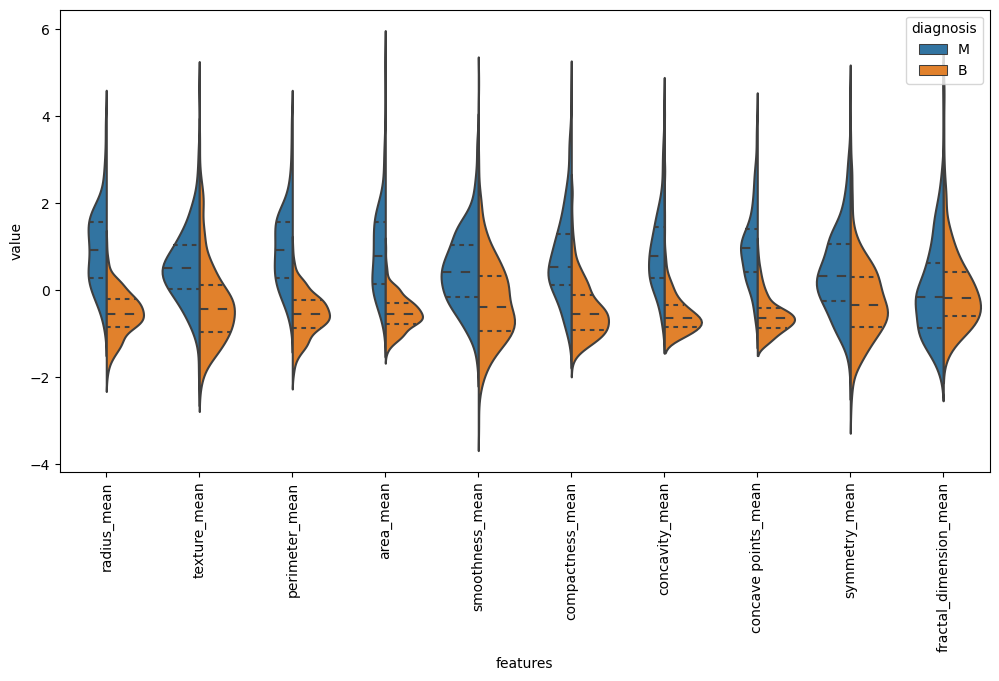

In [13]:
data=X
data_dia=y
data_mean=(data-data.mean())/(data.std())
data=pd.concat([y,data_mean.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(12,6))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=90)
plt.show()


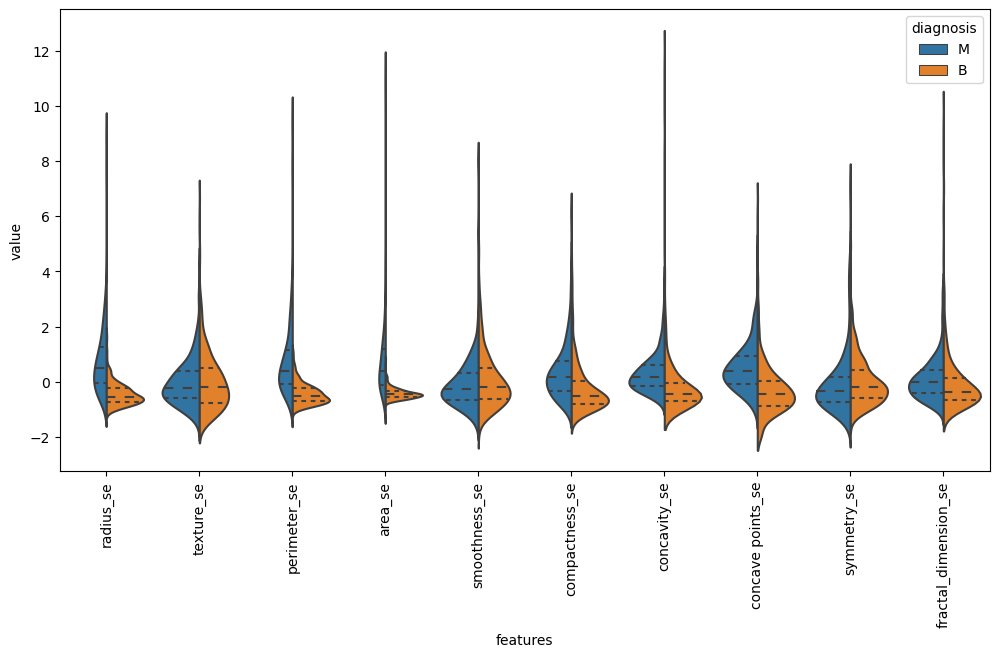

In [14]:
data=X
data_dia=y
data_mean=(data-data.mean())/(data.std())
data_2=pd.concat([y,data_mean.iloc[:,10:20]],axis=1)
data_2=pd.melt(data_2,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(12,6))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data_2,split=True,inner='quart')
plt.xticks(rotation=90)
plt.show()

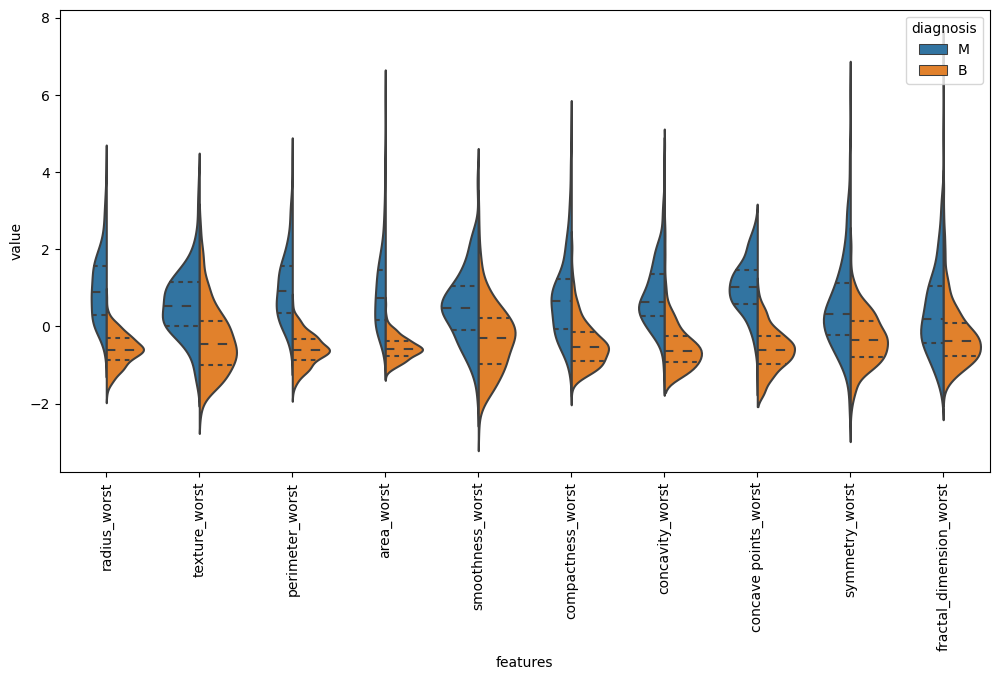

In [15]:
data=X
data_dia=y
data_mean=(data-data.mean())/(data.std())
data_3=pd.concat([y,data_mean.iloc[:,20:]],axis=1)
data_3=pd.melt(data_3,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(12,6))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data_3,split=True,inner='quart')
plt.xticks(rotation=90)
plt.show()

### from the previous 3 violinplot we see that many features is the same in the two cases 

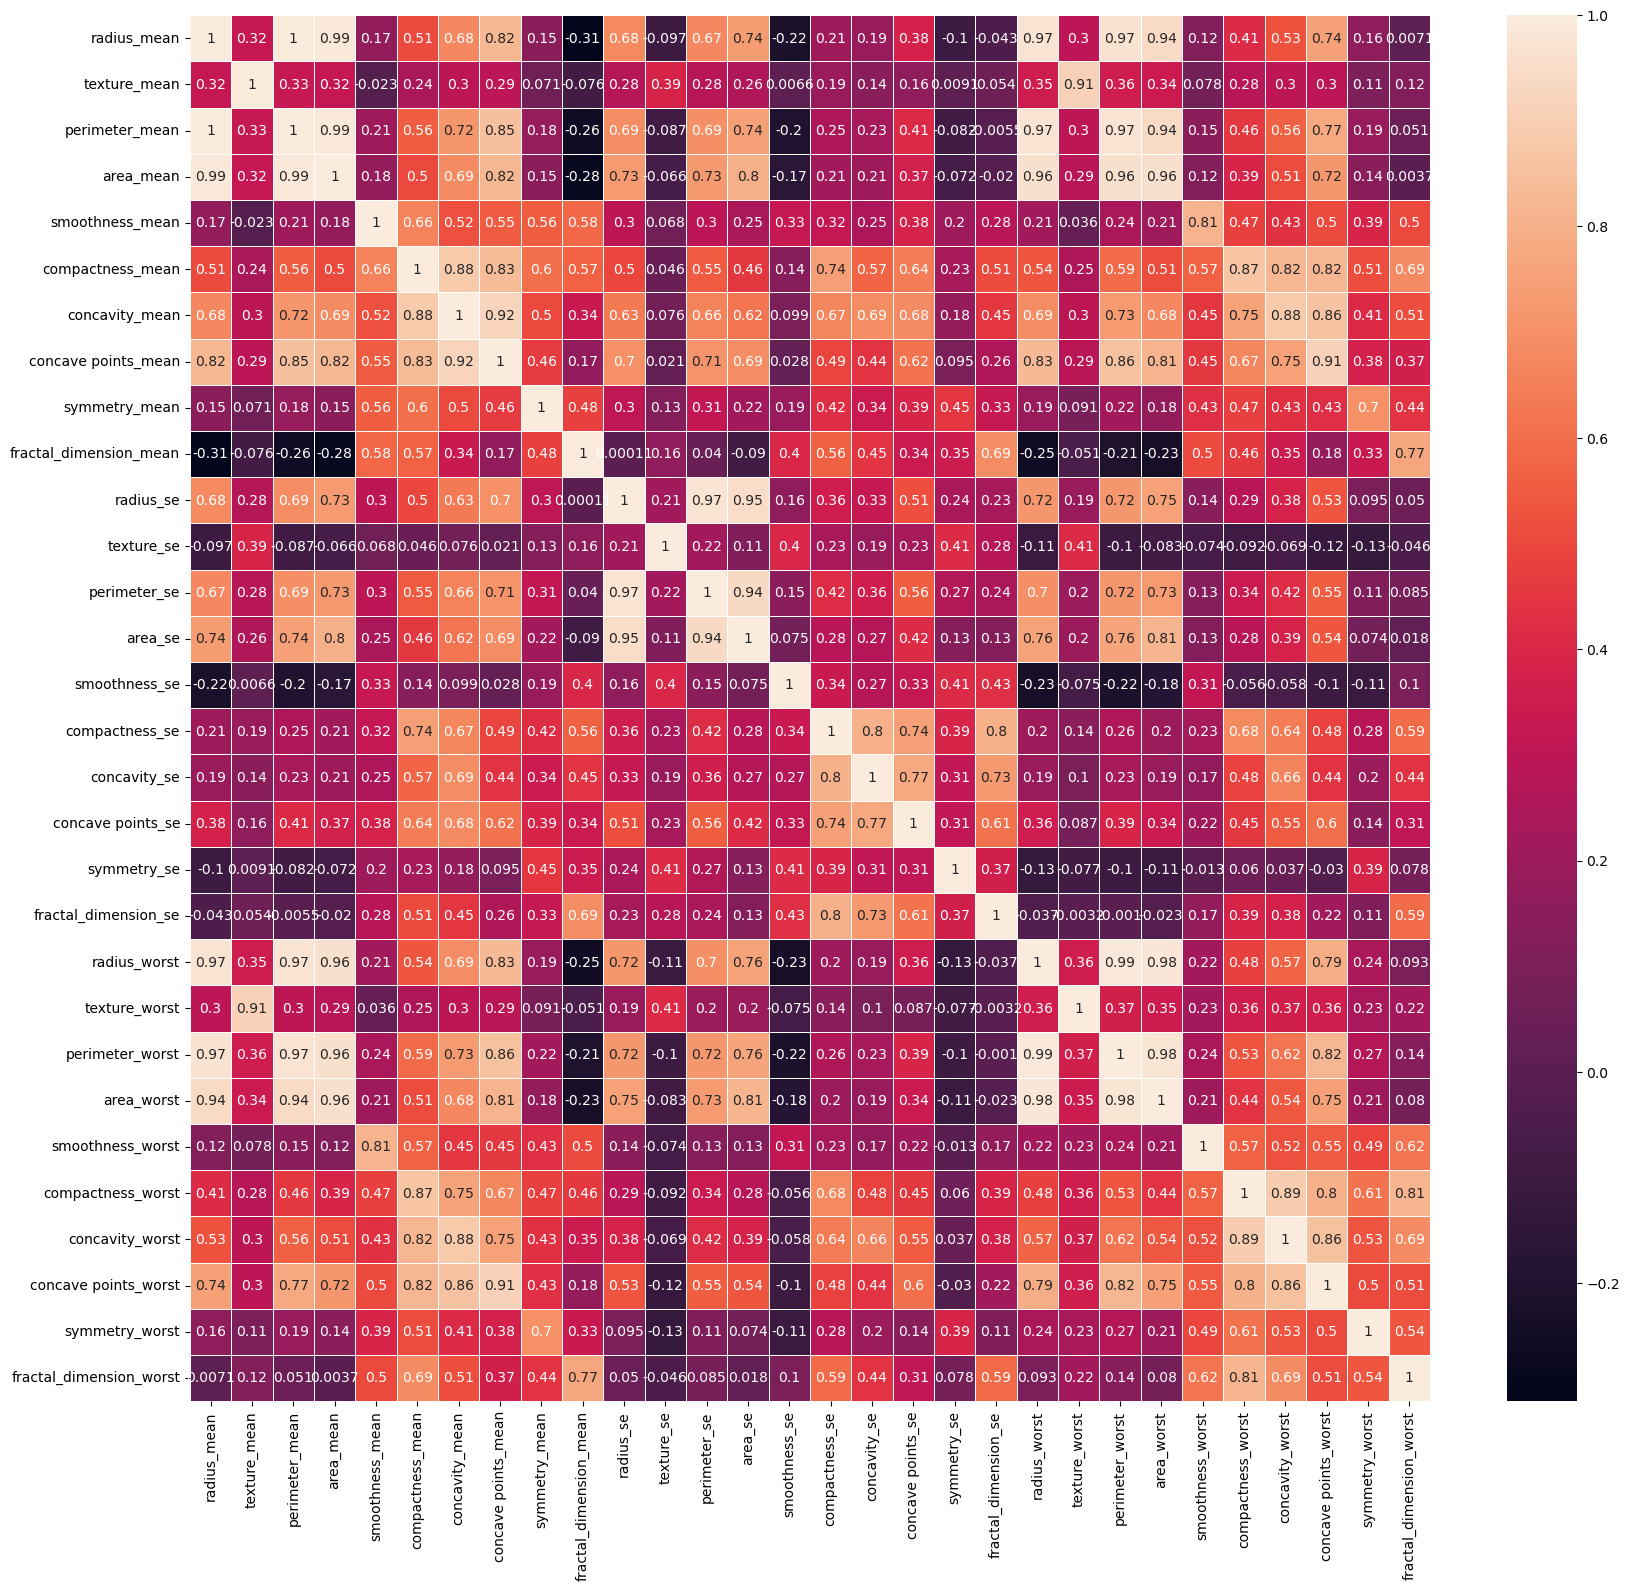

In [16]:
fig,ax=plt.subplots(figsize=(20,18))
sns.heatmap(X.corr(),annot=True,ax=ax,linewidths=0.5)
plt.show()

In [20]:
y=y.apply(lambda x: 0 if x=='B'  else 1)

In [25]:
std=StandardScaler()
scaled_x=pd.DataFrame(std.fit_transform(X),columns=X.columns)

In [34]:
param_grid_svm={'C':[0.1,1,5,10],'kernel': ['linear', 'poly', 'rbf'], 'gamma': [0.1, 1, 10]}
clf=SVC()
grid_search=GridSearchCV(clf,param_grid_svm,cv=5)
grid_search.fit(scaled_x,y)
print('best paramter',grid_search.best_params_)
print('best score',grid_search.best_score_)

best paramter {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
best score 0.9754075454122031


In [39]:
param_grid = {'max_depth': list(range(5,20,5)), 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(scaled_x,y)
print('best paramter',grid_search.best_params_)
print('best score',grid_search.best_score_)

best paramter {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
best score 0.9402577239559073


In [40]:
# to check the most importat features

import eli5
from eli5.sklearn import PermutationImportance 
X_train,X_valid,y_train,y_valid=train_test_split(scaled_x,y,random_state=42,test_size=0.2)
svm=SVC(C=0.1,gamma=0.1,kernel='linear').fit(X_train,y_train)
perm=PermutationImportance(svm,random_state=0).fit(X_valid,y_valid)
eli5.show_weights(perm,feature_names=X_valid.columns.tolist())

Weight,Feature
0.0175 ± 0.0157,concave points_worst
0.0158 ± 0.0131,compactness_se
0.0140 ± 0.0179,texture_worst
0.0140 ± 0.0179,symmetry_worst
0.0123 ± 0.0211,concavity_mean
0.0105 ± 0.0172,perimeter_mean
0.0105 ± 0.0131,concave points_mean
0.0105 ± 0.0070,radius_worst
0.0088 ± 0.0192,smoothness_worst
0.0088 ± 0.0222,radius_se


In [41]:
feature_importance=perm.feature_importances_
top_indices=np.argsort(feature_importance)[::-1]
top_indices=top_indices[:15]


In [42]:
most_15_important_features=list(X.columns[top_indices])
X_reduced=X[most_15_important_features]

In [43]:
most_15_important_features

['concave points_worst',
 'compactness_se',
 'texture_worst',
 'symmetry_worst',
 'concavity_mean',
 'concave points_mean',
 'perimeter_mean',
 'radius_worst',
 'smoothness_worst',
 'radius_se',
 'area_se',
 'perimeter_se',
 'area_mean',
 'perimeter_worst',
 'radius_mean']

In [44]:
scores=pd.DataFrame(columns=['model','f1_score','percision','recall','accuracy_score'])
def train_validate_model(model_name,model,X,y):
    X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42,test_size=0.2)
    model=make_pipeline(StandardScaler(),model)
    model.fit(X_train,y_train)
    y_hat=model.predict(X_valid)
    f1_score_=f1_score(y_valid,y_hat)
    accuracy_score_=accuracy_score(y_valid,y_hat)
    precision_score_=precision_score(y_valid,y_hat)
    recall_score_=recall_score(y_valid,y_hat)
    scores.loc[len(scores)]=[model,f1_score_,precision_score_,recall_score_,accuracy_score_]
    print('f1_score',f1_score_)
    print(20*'-')
    print('accuracy_score',accuracy_score_)
    print(20*'-')
    print('precision_score',precision_score_)
    print(20*'-')
    print('recall_score',recall_score_)

In [45]:
svm=SVC(gamma=0.1,C=0.1,kernel='linear')
train_validate_model('svm',svm,X_reduced,y)

f1_score 0.9761904761904763
--------------------
accuracy_score 0.9824561403508771
--------------------
precision_score 1.0
--------------------
recall_score 0.9534883720930233


### so the reults indcate for a good predction